<a href="https://colab.research.google.com/github/abnermassimo1/Metodos-Numericos/blob/main/Simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regla de Simpson**

La **regla de Simpson compuesta** es un método numérico para aproximar integrales definidas. Divide el intervalo \([a, b]\) en un número par \(n\) de subintervalos, de ancho \(h = \frac{b - a}{n}\), y utiliza parábolas para aproximar la función en cada subintervalo.

La fórmula de Simpson compuesta es:
$$
[
\int_a^b f(x)\,dx \approx \frac{h}{3} \left[ f(x_0) + 2 \sum_{i=1}^{n/2 - 1} f(x_{2i}) + 4 \sum_{i=1}^{n/2} f(x_{2i - 1}) + f(x_n) \right]
]
$$

La gráfica de la función muestra los puntos utilizados en la interpolación y el área bajo la curva, visualizando así la aproximación obtenida con la regla compuesta de Simpson.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
# Definimos la función a integrar
# En este caso: f(x) = e^x + 4x^2 + x^3
def f(x):
    return np.exp(x) + 4 * x**2 + x**3

# Función que implementa la regla compuesta de Simpson
def simpson_compuesto(a, b, n):
    # Validamos que n sea par, como lo requiere la regla de Simpson
    if n % 2 != 0:
        raise ValueError("n debe ser un número par.")

    # Paso 1: Calcular h, el ancho de cada subintervalo
    h = (b - a) / n

    # Paso 2: Inicializar sumas
    XI0 = f(a) + f(b)  # f(a) + f(b)
    XI1 = 0            # Suma de f(x_{2i-1}), i impar
    XI2 = 0            # Suma de f(x_{2i}), i par

    # Paso 3: Iterar sobre los puntos interiores
    for i in range(1, n):
        x = a + i * h  # Paso 4: calcular el punto xi
        if i % 2 == 0:
            XI2 += f(x)  # Paso 5: si es par, suma a XI2
        else:
            XI1 += f(x)  # Si es impar, suma a XI1

    # Paso 6: Aplicar la fórmula compuesta de Simpson
    XI = (h / 3) * (XI0 + 2 * XI2 + 4 * XI1)

    # Paso 7: Devolver la aproximación
    return XI

# Parámetros del ejemplo (del libro)
a = 0      # Límite inferior
b = 2      # Límite superior
n = 4      # Número de subintervalos (debe ser par)

# Aplicamos la regla de Simpson
resultado = simpson_compuesto(a, b, n)

# Importamos sympy para obtener el valor exacto de la integral
from sympy import symbols, integrate, exp

# Definimos la variable simbólica
x = symbols('x')

# Calculamos el valor exacto de la integral simbólicamente
integral_exacta = integrate(exp(x) + 4*x**2 + x**3, (x, a, b)).evalf()

# Calculamos el error como diferencia entre exacto y aproximado
error = float(integral_exacta - resultado)

# -------------------------------
# GRAFICAR la función y puntos usados
# -------------------------------

# Creamos un conjunto de valores x para dibujar la curva de la función
x_vals = np.linspace(a, b, 400)
y_vals = f(x_vals)  # Evaluamos la función en esos puntos

# Obtenemos los puntos usados por la regla de Simpson (n+1 puntos)
x_puntos = np.linspace(a, b, n + 1)
y_puntos = f(x_puntos)

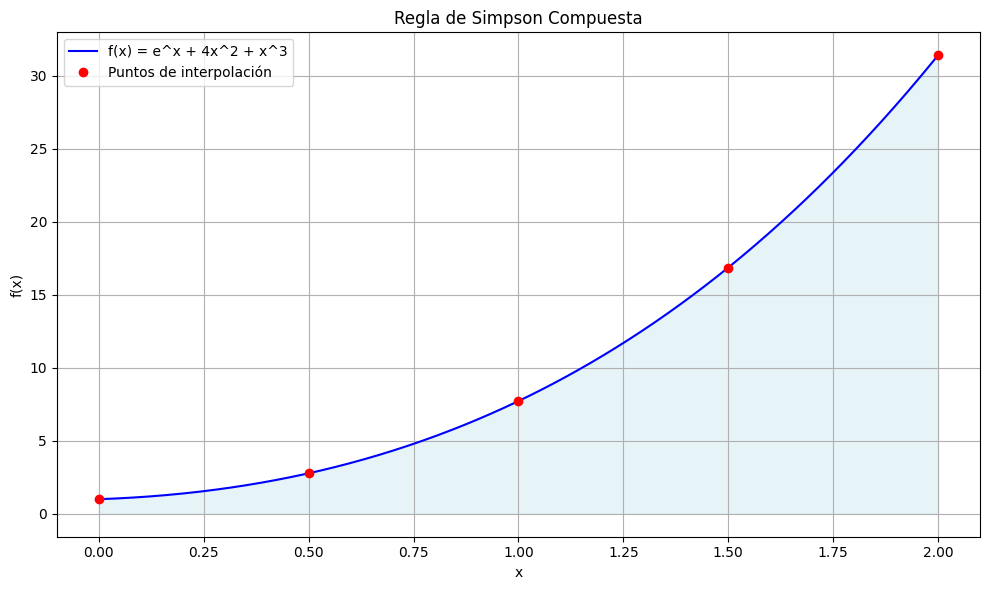

Aproximación de la integral: 21.057877
Valor exacto de la integral: 21.055723
Error: -0.002154


In [6]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Dibujamos la función f(x)
plt.plot(x_vals, y_vals, label="f(x) = e^x + 4x^2 + x^3", color="blue")

# Dibujamos los puntos usados en la interpolación
plt.plot(x_puntos, y_puntos, 'ro', label="Puntos de interpolación")

# Rellenamos el área bajo la curva para visualizar la integral
plt.fill_between(x_vals, y_vals, color="lightblue", alpha=0.3)

# Añadimos título y etiquetas
plt.title("Regla de Simpson Compuesta")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostramos la gráfica
plt.show()

# Finalmente imprimimos los resultados
print(f"Aproximación de la integral: {resultado:.6f}")
print(f"Valor exacto de la integral: {integral_exacta:.6f}")
print(f"Error: {error:.6f}")